# Project: Insurance Fraud Detection (DS)
---------------------------------------------

**Dr. Dave Wanik - OPIM 5512: Data Science Using Python - University of Connecticut**

*This dataset comes from the 2023 NESS Statathon (Theme 1). Here is a link to where the live competition is being hosted - feel free to join!*
* https://www.kaggle.com/competitions/2023-travelers-ness-statathon/overview



*   **Group Members: Rohit Akole (rva23001) & Yash Parihar (yap23003)**
*   **Group Number: Group Number 10**




**Challenge:** You work for Travelers Insurance Company's fraud detection department as a modeler. Your colleagues, who are not familiar with statistics, would like you to create a predictive model based on historical claim data. Your team is concerned about the fraud detection accuracy as well as the key drivers that cause fraudulence.

For this case competition, your group is tasked with identifying first-party physical damage fraudulence and explaining the indicators of fraudulent claims.
  * Make sure you use the 'weighted' F1 score - you can just print this using the classification report (bottom right corner).
    * https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html

# Rubric
The submitted notebook will serve as both a form of model documentation and business communication - there should be lots of text cells and comments and a nice presentation of your work. Do not send sloppy code and think you'll be fine - pretend this document is going to your AVP of Data Science - It should be both technical and business-friendly. If you send me garbage, your grade will be garbage!

## EDA, data cleaning and feature engineering (20 points)
* `X_train`, `X_test`, `y_train`, and `y_test` has been provided to all students.
  * Any team who does not do this automatically goes into last place - more below!
* Explore the data and clean it up as you see fit - make sure you `fit_transform()` on the training data and `transform()` on the test data.
  * Any team that has data leakage automatically goes into last place!
* Make five meaningful plots and five meaningful tables (most be deeper than simpler univariate plots - we want you to really explore the problem at hand and use this information to make a better model!)
* It is up to you whether or not you want to curate the training dataset to get a better fit on the test dataset (for example, if you would like to use some sampling strategy like SMOTE, that's great - just remember that you DON'T change the distribution of the target variable in the test partition.)

## Modeling (20 points)
* You may perform your modeling in a different notebook (to be submitted as an appendix), but you must run your final and BEST model here and all output must be displayed.
  * It's up to you to decide what the best pre-processing steps should be!

## Model Results (20 points)
* Classification report and confusion report for train and test partition.
  * You may use cross-validation to help pick the optimal hyperparameters for your model.
  * You may change the classification threshold from 0.5 to anything else that improves your score.
* Verify your shape of the test partition to ensure there is no data leakage!

## Interpretability and Discussion (30 points)
* Create permutation importance for top five variables
* Create partial dependence plots for top five variables
  * Don't forget about the `num_grid_points` argument to your PDP if it takes a long time to make the plot.
  * Don't wait until the last minute and say your code was crashing - work on this early or I have to deduct points!
* You may add other tables/plots/analyses to help tell your story!
*  Use your model results and interpretability items to present what variables are most influential in causing a policy cancellation.
  * We are looking for each team to provide a business recommendation based on the results of your model! We will take off substantial points if there is not a well-written and cohesive presentation of results.

## Conclusions (10 points)
* Write five meaningful bullets (each bullet should be at least two sentences long) describing what you learned.
  * Don't use ChatGPT or you get 0 points for this.

## 🛷 Sliding grading scale
* You are in direct competition with every other group in the class!
* I expect everything in this notebook to be of sufficient quality - well-organized with lots of comments and cleaned up nice for presentation to management. I will deduct substantial points if this is just my code copy/pasted without any deep analysis.
* Your 'starting grades' will range from an 80 to a 100 based on model F1 score for the TEST PARTITION (you can use the `F1 score` function from sci-kit learn to evaluate the final model.)
* Of course, if something is missing from the above rubric, we will deduct points from your starting grade.
  * If you came in first place and lost 10 points somewhere, your final grade is 100 - 10 = 90
  * If you came in last place (for accuracy) and lost 10 points somewhere, your final grade is 80 - 10 = 70.


# Dataset Description
All first-party physical damage claims will be filtered by claim handlers and some of them will be referred to the fraud detection team. Your data is a sample of these referred claims from 2015 to 2016.

As a simplification, you are just going to work with the train dataset (linked below). This is because it has the answers! All teams will use the same random_seed to split the data into train and test - Dave will do this part for you. You may not delete rows in the test partition, use `transform()` to update rows in test partition, you can do almost anything you want on the train partition. If there is data leakage, you automatically go into last place (more on that later.)

Your work is to build a model on the training data and apply your model to predict the fraud indicator for each claim in the test data.

**Variable Descriptions**
* claim_number - Claim ID **(cannot be used in model)**
* age_of_driver - Age of driver
* gender - Gender of driver
* marital_status - Marital status of driver
* safty_rating - Safety rating index of driver
* annual_income - Annual income of driver
* high_education_ind - Driver’s high education index
* address_change_ind - Whether or not the driver changed living address in past 1 year
* living_status - Driver’s living status, own or rent
* zip_code - Driver’s living address zipcode
* claim_date - Date of first notice of claim
* claim_day_of_week - Day of week of first notice of claim
* accident_site - Accident location, highway, parking lot or local
* past_num_of_claims - Number of claims the driver reported in past 5 years
* witness_present_ind - Witness indicator of the claim
* liab_prct - Liability percentage of the claim
* channel - The channel of purchasing policy
* policy_report_filed_ind - Policy report filed indicator
* claim_est_payout - Estimated claim payout
* age_of_vehicle - Age of first party vehicle
* vehicle_category - Category of first party vehicle
* vehicle_price - Price of first party vehicle
* vehicle_color - Color of first party vehicle
* vehicle_weight - Weight of first party vehicle
* fraud - Fraud indicator (0=no, 1=yes). **This is the response variable.**

The train and test files have also been made available to students for modeling on HuskyCT.

# Dependencies

In [1]:
!pip install pulp # for partial dependence plots!
!pip install pycebox

In [2]:
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import f1_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from imblearn.over_sampling import SVMSMOTE
from sklearn.inspection import permutation_importance, PartialDependenceDisplay
from pycebox.ice import ice, ice_plot

# Suppress future warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Dataset

In [3]:
!gdown 1a2PQEdhl1-pnx8czvEf8ngpH6sTBRVqq

Downloading...
From: https://drive.google.com/uc?id=1a2PQEdhl1-pnx8czvEf8ngpH6sTBRVqq
To: /content/train_2023.csv
100% 2.62M/2.62M [00:00<00:00, 118MB/s]


In [4]:
df = pd.read_csv('train_2023.csv')
df.head()

,claim_number,age_of_driver,gender,marital_status,safty_rating,annual_income,high_education_ind,address_change_ind,living_status,zip_code,...,liab_prct,channel,policy_report_filed_ind,claim_est_payout,age_of_vehicle,vehicle_category,vehicle_price,vehicle_color,vehicle_weight,fraud
0,0,50,F,1.0,66,39117,1,0,Own,50051,...,18,Broker,0,5464.903723,3.0,Large,16786.28845,blue,34183.436390,0
1,1,47,M,1.0,78,38498,1,0,Own,50012,...,81,Broker,0,5448.155974,4.0,Large,20793.29881,black,14528.379730,0
2,2,28,M,0.0,76,33343,0,1,Rent,20158,...,94,Broker,1,1858.971699,4.0,Compact,6729.47649,blue,7182.832636,0
3,3,36,M,1.0,56,35832,1,0,Own,50054,...,95,Phone,0,4040.932844,5.0,Compact,24914.26785,gray,47891.788790,0
4,4,60,F,1.0,79,40948,1,1,Rent,80010,...,53,Phone,1,4876.606138,6.0,Medium,17392.41997,black,7546.494014,0


In [5]:
# hint: do you have imbalanced data?
df['fraud'].value_counts() # yes you do!

fraud
0    16062
1     2938
Name: count, dtype: int64

In [6]:
# split the data (don't change this!)
X = df.drop(['claim_number', 'fraud'],axis=1)
y = df['fraud']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [7]:
# check the shapes
print(df.shape)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(19000, 25)
(15200, 23) (15200,)
(3800, 23) (3800,)


Please use nice big, descriptive subheaders so that it is easy to grade! Thank you!

# #1. Exploratory Data Analysis

## 1.1 Initial DataFrame Statistics

In [8]:
X_train.describe()

,age_of_driver,marital_status,safty_rating,annual_income,high_education_ind,address_change_ind,zip_code,past_num_of_claims,witness_present_ind,liab_prct,policy_report_filed_ind,claim_est_payout,age_of_vehicle,vehicle_price,vehicle_weight
count,15200.000000,15196.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15087.000000,15200.000000,15200.000000,15182.000000,15194.000000,15200.000000,15200.000000
mean,43.577368,0.717491,73.470395,37331.196184,0.699211,0.571579,49927.536382,0.499408,0.236495,49.421842,0.599342,4994.857484,5.012242,23002.479416,23013.770794
std,12.115236,0.450234,15.472854,2996.757118,0.458616,0.494866,29213.752490,0.948853,0.424944,33.654185,0.490048,2226.412072,2.248788,12011.181530,12105.526639
min,18.000000,0.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,417.826352,0.000000,2261.507903,2429.429302
25%,35.000000,0.000000,65.000000,35550.000000,0.000000,0.000000,20111.000000,0.000000,0.000000,17.000000,0.000000,3368.509686,3.000000,14190.143350,14115.867805
50%,43.000000,1.000000,76.000000,37607.000000,1.000000,1.000000,50027.000000,0.000000,0.000000,50.000000,1.000000,4675.629146,5.000000,20782.731950,20783.493005
75%,51.000000,1.000000,85.000000,39317.000000,1.000000,1.000000,80038.000000,1.000000,0.000000,81.000000,1.000000,6259.469265,6.000000,29440.089263,29442.240695
max,278.000000,1.000000,100.000000,56275.000000,1.000000,1.000000,85083.000000,6.000000,1.000000,100.000000,1.000000,23903.366250,16.000000,127063.506000,103192.723700


## 1.2 Exploring Datatypes

In [9]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15200 entries, 6787 to 15795
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age_of_driver            15200 non-null  int64  
 1   gender                   15200 non-null  object 
 2   marital_status           15196 non-null  float64
 3   safty_rating             15200 non-null  int64  
 4   annual_income            15200 non-null  int64  
 5   high_education_ind       15200 non-null  int64  
 6   address_change_ind       15200 non-null  int64  
 7   living_status            15200 non-null  object 
 8   zip_code                 15200 non-null  int64  
 9   claim_date               15200 non-null  object 
 10  claim_day_of_week        15200 non-null  object 
 11  accident_site            15200 non-null  object 
 12  past_num_of_claims       15200 non-null  int64  
 13  witness_present_ind      15087 non-null  float64
 14  liab_prct               

## 1.3 Exploring Null values

In [10]:
X_train.isnull().sum()

age_of_driver                0
gender                       0
marital_status               4
safty_rating                 0
annual_income                0
high_education_ind           0
address_change_ind           0
living_status                0
zip_code                     0
claim_date                   0
claim_day_of_week            0
accident_site                0
past_num_of_claims           0
witness_present_ind        113
liab_prct                    0
channel                      0
policy_report_filed_ind      0
claim_est_payout            18
age_of_vehicle               6
vehicle_category             0
vehicle_price                0
vehicle_color                0
vehicle_weight               0
dtype: int64

## 1.4 Exploring Unique Values

In [11]:
print(X_train['living_status'].unique())
print(X_train['marital_status'].unique())
print(X_train['accident_site'].unique())
print(X_train['channel'].unique())
print(X_train['vehicle_category'].unique())
print(X_train['vehicle_color'].unique())

['Rent' 'Own']
[ 1.  0. nan]
['Parking Lot' 'Highway' 'Local']
['Broker' 'Phone' 'Online']
['Large' 'Medium' 'Compact']
['gray' 'red' 'blue' 'white' 'other' 'black' 'silver']


# #2. Data Cleaning

### 2.1 Imputing Missing Values

In [12]:
# Fill missing values for witness_present_ind with the most frequent value
most_frequent_value = df['witness_present_ind'].mode()[0]
X_train['witness_present_ind'].fillna(most_frequent_value, inplace=True)

# Fill missing values for age_of_vehicle with the median
median_age_of_vehicle = df['age_of_vehicle'].median()
X_train['age_of_vehicle'].fillna(median_age_of_vehicle, inplace=True)

# Fill missing values for claim_est_payout with the median
median_claim_est_payout = df['claim_est_payout'].median()
X_train['claim_est_payout'].fillna(median_claim_est_payout, inplace=True)

# Ensure no missing values for marital_status for robustness
most_frequent_marital_status = df['marital_status'].mode()[0]
X_train['marital_status'].fillna(most_frequent_marital_status, inplace=True)

# Verify that there are no missing values left
print(X_train.isnull().sum())

age_of_driver              0
gender                     0
marital_status             0
safty_rating               0
annual_income              0
high_education_ind         0
address_change_ind         0
living_status              0
zip_code                   0
claim_date                 0
claim_day_of_week          0
accident_site              0
past_num_of_claims         0
witness_present_ind        0
liab_prct                  0
channel                    0
policy_report_filed_ind    0
claim_est_payout           0
age_of_vehicle             0
vehicle_category           0
vehicle_price              0
vehicle_color              0
vehicle_weight             0
dtype: int64


In [13]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((15200, 23), (15200,), (3800, 23), (3800,))

In [14]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15200 entries, 6787 to 15795
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age_of_driver            15200 non-null  int64  
 1   gender                   15200 non-null  object 
 2   marital_status           15200 non-null  float64
 3   safty_rating             15200 non-null  int64  
 4   annual_income            15200 non-null  int64  
 5   high_education_ind       15200 non-null  int64  
 6   address_change_ind       15200 non-null  int64  
 7   living_status            15200 non-null  object 
 8   zip_code                 15200 non-null  int64  
 9   claim_date               15200 non-null  object 
 10  claim_day_of_week        15200 non-null  object 
 11  accident_site            15200 non-null  object 
 12  past_num_of_claims       15200 non-null  int64  
 13  witness_present_ind      15200 non-null  float64
 14  liab_prct               

## 2.2. Handling Outliers

In [15]:
X_train.describe()

,age_of_driver,marital_status,safty_rating,annual_income,high_education_ind,address_change_ind,zip_code,past_num_of_claims,witness_present_ind,liab_prct,policy_report_filed_ind,claim_est_payout,age_of_vehicle,vehicle_price,vehicle_weight
count,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000
mean,43.577368,0.717566,73.470395,37331.196184,0.699211,0.571579,49927.536382,0.499408,0.234737,49.421842,0.599342,4994.472617,5.012237,23002.479416,23013.770794
std,12.115236,0.450198,15.472854,2996.757118,0.458616,0.494866,29213.752490,0.948853,0.423848,33.654185,0.490048,2225.121400,2.248344,12011.181530,12105.526639
min,18.000000,0.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,417.826352,0.000000,2261.507903,2429.429302
25%,35.000000,0.000000,65.000000,35550.000000,0.000000,0.000000,20111.000000,0.000000,0.000000,17.000000,0.000000,3371.034704,3.000000,14190.143350,14115.867805
50%,43.000000,1.000000,76.000000,37607.000000,1.000000,1.000000,50027.000000,0.000000,0.000000,50.000000,1.000000,4671.827763,5.000000,20782.731950,20783.493005
75%,51.000000,1.000000,85.000000,39317.000000,1.000000,1.000000,80038.000000,1.000000,0.000000,81.000000,1.000000,6258.319323,6.000000,29440.089263,29442.240695
max,278.000000,1.000000,100.000000,56275.000000,1.000000,1.000000,85083.000000,6.000000,1.000000,100.000000,1.000000,23903.366250,16.000000,127063.506000,103192.723700


<Axes: xlabel='fraud', ylabel='annual_income'>

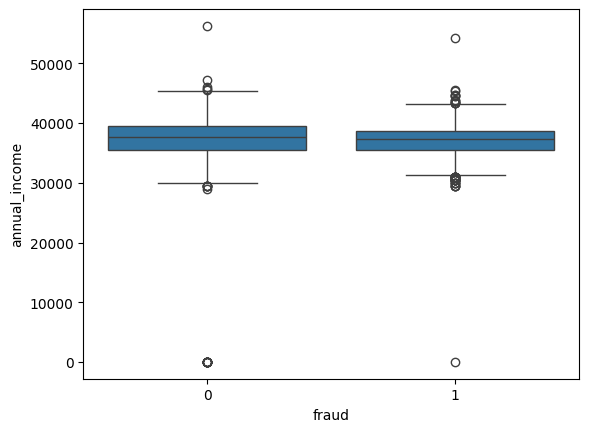

In [16]:
sns.boxplot(x= y_train, y=X_train['annual_income'])

<Axes: xlabel='gender', ylabel='age_of_driver'>

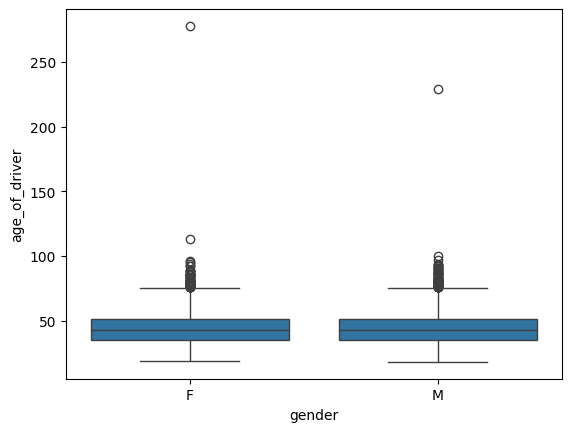

In [17]:
sns.boxplot(x='gender', y='age_of_driver', data=X_train)



*   As per the box plots before handling the outliers
    * Annual Income some rows has the annual_income around 0 and some have income around 55000.
    * In the age of driver, there are values greater than 100, which is highly unlikely.



In [18]:
# Setting up the upper and lower bound for the outliers in given columns
possible_outlier_features = ['age_of_driver', 'annual_income']

def impute_outliers_with_mean(df, possible_outlier_features):
  for feature in possible_outlier_features:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 2 * IQR
    upper_bound = Q3 + 2 * IQR

    # Finding the mean of the feature
    mean_value = df[feature].mean()

    # Replacing the values less than lower bound and greater than upper bound with the mean value
    df[feature] = np.where((df[feature] < lower_bound) | (df[feature] > upper_bound), mean_value, df[feature])

impute_outliers_with_mean(X_train, possible_outlier_features)

In [19]:
X_train.describe()

,age_of_driver,marital_status,safty_rating,annual_income,high_education_ind,address_change_ind,zip_code,past_num_of_claims,witness_present_ind,liab_prct,policy_report_filed_ind,claim_est_payout,age_of_vehicle,vehicle_price,vehicle_weight
count,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000
mean,43.402990,0.717566,73.470395,37362.562193,0.699211,0.571579,49927.536382,0.499408,0.234737,49.421842,0.599342,4994.472617,5.012237,23002.479416,23013.770794
std,11.580328,0.450198,15.472854,2765.264481,0.458616,0.494866,29213.752490,0.948853,0.423848,33.654185,0.490048,2225.121400,2.248344,12011.181530,12105.526639
min,18.000000,0.000000,1.000000,28896.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,417.826352,0.000000,2261.507903,2429.429302
25%,35.000000,0.000000,65.000000,35551.000000,0.000000,0.000000,20111.000000,0.000000,0.000000,17.000000,0.000000,3371.034704,3.000000,14190.143350,14115.867805
50%,43.000000,1.000000,76.000000,37607.000000,1.000000,1.000000,50027.000000,0.000000,0.000000,50.000000,1.000000,4671.827763,5.000000,20782.731950,20783.493005
75%,51.000000,1.000000,85.000000,39317.000000,1.000000,1.000000,80038.000000,1.000000,0.000000,81.000000,1.000000,6258.319323,6.000000,29440.089263,29442.240695
max,83.000000,1.000000,100.000000,46048.000000,1.000000,1.000000,85083.000000,6.000000,1.000000,100.000000,1.000000,23903.366250,16.000000,127063.506000,103192.723700


<Axes: xlabel='fraud', ylabel='annual_income'>

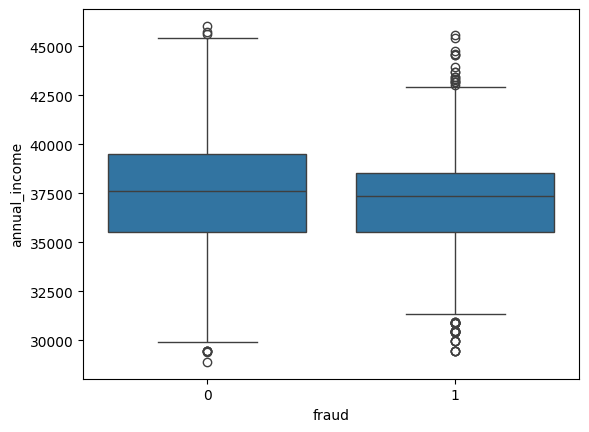

In [20]:
sns.boxplot(x= y_train, y=X_train['annual_income'])

<Axes: xlabel='gender', ylabel='age_of_driver'>

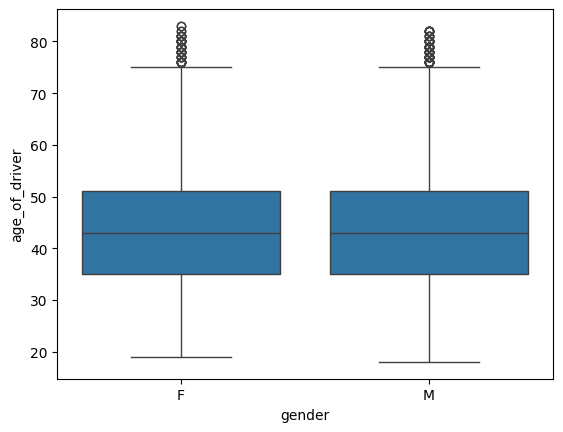

In [21]:
sns.boxplot(x='gender', y='age_of_driver', data=X_train)

* These are the boxplots after handling outliers

# #3. Feature Engineering

## 3.1. Standarding the data

In [22]:
# Transforming claim_date to numerical feature
X_train['claim_day_of_year'] = pd.to_datetime(X_train['claim_date']).dt.dayofyear
X_test['claim_day_of_year'] = pd.to_datetime(X_test['claim_date']).dt.dayofyear

# Adding claim_day_of_week as a categorical feature
X_train['claim_day_of_week'] = pd.to_datetime(X_train['claim_date']).dt.day_name()
X_test['claim_day_of_week'] = pd.to_datetime(X_test['claim_date']).dt.day_name()

numerical_features = ['age_of_driver', 'age_of_vehicle', 'marital_status', 'zip_code', 'safty_rating',
                      'witness_present_ind', 'annual_income', 'high_education_ind',
                      'policy_report_filed_ind', 'address_change_ind', 'past_num_of_claims', 'liab_prct',
                      'claim_est_payout', 'vehicle_price', 'vehicle_weight', 'claim_day_of_year']

categorical_features = ['gender', 'living_status', 'accident_site',  'channel',
                        'vehicle_category', 'vehicle_color', 'claim_day_of_week']

X_train_cat = X_train[categorical_features]
X_test_cat = X_test[categorical_features]

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_features)
    ])

X_train_scale = preprocessor.fit_transform(X_train)
X_test_scale = preprocessor.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scale, columns=preprocessor.get_feature_names_out())
X_test_scaled = pd.DataFrame(X_test_scale, columns=preprocessor.get_feature_names_out())

X_train_scaled.shape, y_train.shape, X_test_scaled.shape, y_test.shape

((15200, 36), (15200,), (3800, 36), (3800,))

In [23]:
X_train_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15200 entries, 0 to 15199
Data columns (total 36 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   num__age_of_driver                15200 non-null  float64
 1   num__age_of_vehicle               15200 non-null  float64
 2   num__marital_status               15200 non-null  float64
 3   num__zip_code                     15200 non-null  float64
 4   num__safty_rating                 15200 non-null  float64
 5   num__witness_present_ind          15200 non-null  float64
 6   num__annual_income                15200 non-null  float64
 7   num__high_education_ind           15200 non-null  float64
 8   num__policy_report_filed_ind      15200 non-null  float64
 9   num__address_change_ind           15200 non-null  float64
 10  num__past_num_of_claims           15200 non-null  float64
 11  num__liab_prct                    15200 non-null  float64
 12  num_

## 3.2. Sampling

In [24]:
oversample = SVMSMOTE(random_state=42)
X_train_resampled, y_train_resampled = oversample.fit_resample(X_train_scaled, y_train)

# Printing before and after resampling y_train distribution count
print(f"Class distribution before oversampling in train data:{y_train.value_counts()}")
print(f"Class distribution after oversampling in train data: {pd.Series(y_train_resampled).value_counts()}")

Class distribution before oversampling in train data:fraud
0    12853
1     2347
Name: count, dtype: int64
Class distribution after oversampling in train data: fraud
0    12853
1    12853
Name: count, dtype: int64


In [25]:
X_train_resampled.shape, y_train_resampled.shape, X_test_scaled.shape, y_test.shape

((25706, 36), (25706,), (3800, 36), (3800,))

In [26]:
X_train_resampled.head()

,num__age_of_driver,num__age_of_vehicle,num__marital_status,num__zip_code,num__safty_rating,num__witness_present_ind,num__annual_income,num__high_education_ind,num__policy_report_filed_ind,num__address_change_ind,...,cat__vehicle_color_other,cat__vehicle_color_red,cat__vehicle_color_silver,cat__vehicle_color_white,cat__claim_day_of_week_Monday,cat__claim_day_of_week_Saturday,cat__claim_day_of_week_Sunday,cat__claim_day_of_week_Thursday,cat__claim_day_of_week_Tuesday,cat__claim_day_of_week_Wednesday
0,0.224268,-0.005443,0.627376,-1.020496,-1.516925,-0.553841,0.336846,0.655884,0.817616,-1.155055,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,-0.725650,-1.784588,0.627376,0.003199,0.228123,-0.553841,-0.654773,-1.524659,0.817616,-1.155055,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.692323,-0.895016,0.627376,-1.195522,0.809806,-0.553841,1.471675,-1.524659,-1.223068,0.865760,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.310624,-0.450229,0.627376,-1.195317,0.486649,1.805572,0.412067,0.655884,-1.223068,-1.155055,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,-0.552938,1.328916,0.627376,-1.020496,0.551281,1.805572,-0.455871,-1.524659,0.817616,-1.155055,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


# #4. Visulization

## 4.1. Plots

### 4.1.1 Distribution of Fraud Cases by Gender

<ipython-input-27-8ba74ecdc614>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  plot.set_xticklabels([gender_labels[int(float(item.get_text()))] for item in plot.get_xticklabels()])


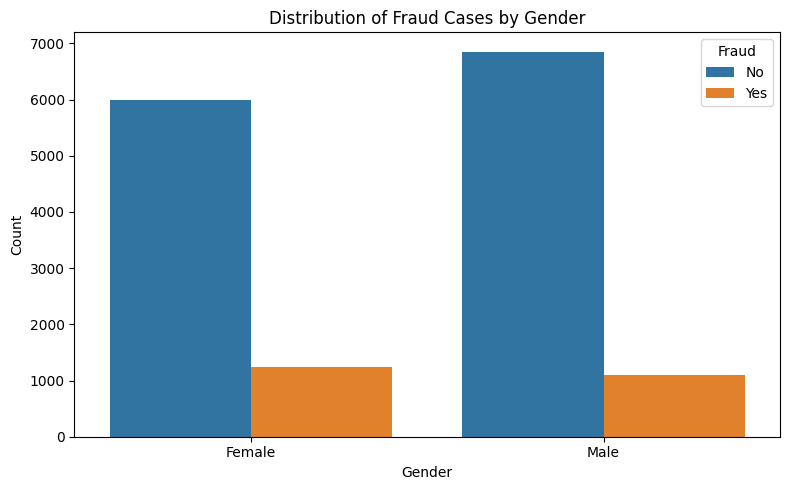

In [27]:
gender_labels = {1: 'Male', 0: 'Female'}

data = pd.concat([X_train_scaled, y_train.reset_index(drop=True)], axis=1)

# Create the plot
plt.figure(figsize=(8, 5))
plot = sns.countplot(x='cat__gender_M', hue='fraud', data=data)
plt.title('Distribution of Fraud Cases by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plot.set_xticklabels([gender_labels[int(float(item.get_text()))] for item in plot.get_xticklabels()])

# Changing Legend Labels
handles, labels = plot.get_legend_handles_labels()
plot.legend(handles, ['No', 'Yes'], title='Fraud')

plt.tight_layout() # Adjust layout to make room for the title
plt.show()

* As we can see from this distribution, there are higher number of fraud case ratio in Female category as compared to Male.

### 4.1.2. Boxplot of Annual Income by Fraud Status

<ipython-input-28-203dadab9e3b>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  plot.set_xticklabels([fraud_labels[int(float(item.get_text()))] for item in plot.get_xticklabels()])


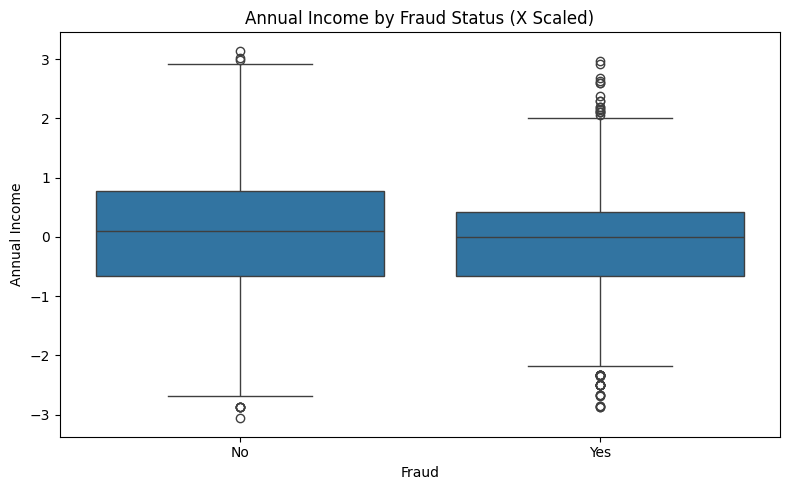

In [28]:
# Labeling Fraud
fraud_labels = {1: 'Yes', 0: 'No'}

# Create the plot
plt.subplots(figsize=(8, 5))
plot = sns.boxplot(x='fraud', y='num__annual_income', data=data)
plt.title('Annual Income by Fraud Status (X Scaled)')
plt.xlabel('Fraud')
plt.ylabel('Annual Income')
plot.set_xticklabels([fraud_labels[int(float(item.get_text()))] for item in plot.get_xticklabels()])

plt.tight_layout()  # Adjust layout to make room for the title
plt.show()

* There are more numbers of outliers on upper bound in Annual Income where fraud status is Yes. It suggests the people with higher income more likely to face fraud.

### 4.1.3. Correleation

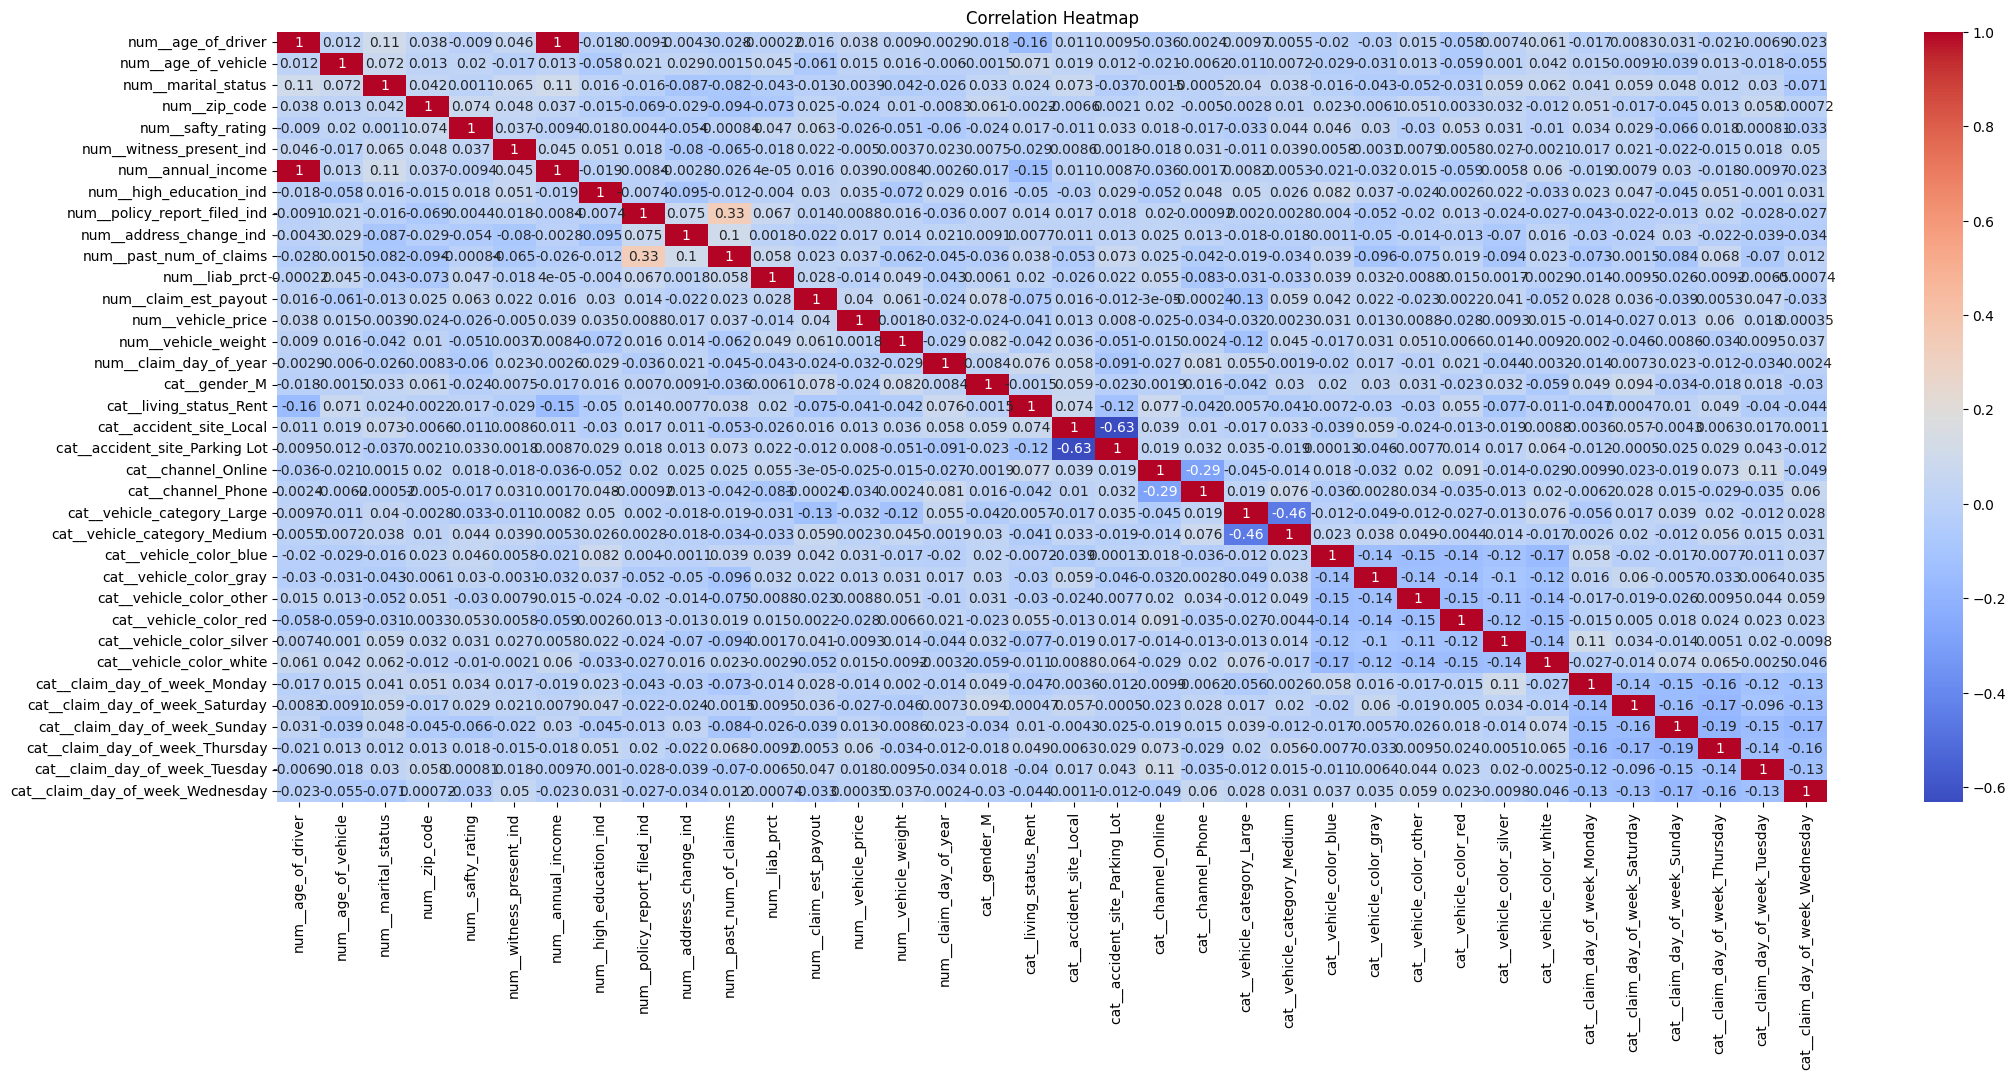

In [29]:
# Calculate correlation matrix
correlation_matrix = X_train_resampled.corr(method='spearman')

# Create the plot
plt.figure(figsize=(25, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')

plt.show()

* The correlation plot suggests the Annual Income is highly correlated to Age of the Driver.
* Policy Report Filed Ind is also correlated with past num of claims at 0.32, suggesting collinearity.

### 4.1.4. Distribution of Fraud Cases by Age Group

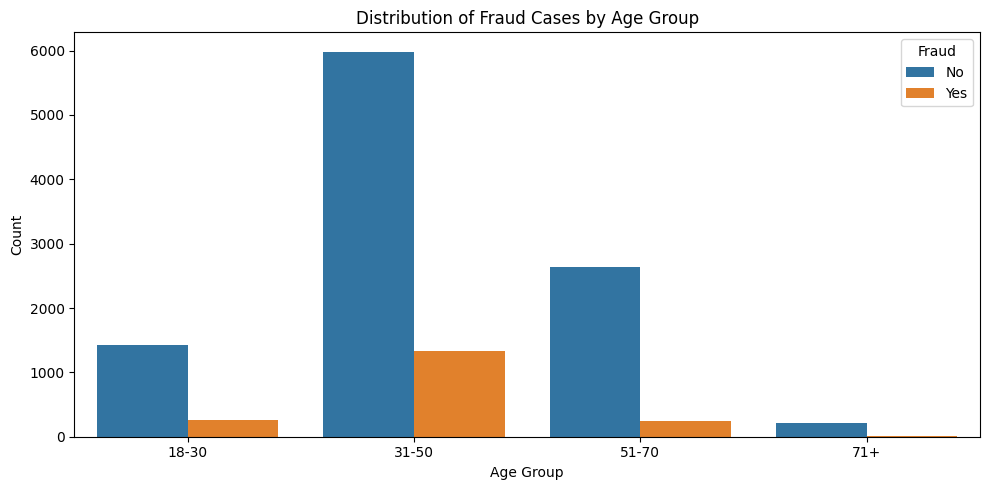

In [30]:
# Creating age groups
X_train_scaled['age_group'] = pd.cut(X_train['age_of_driver'], bins=[17, 30, 50, 70, 100], labels=['18-30', '31-50', '51-70', '71+'])

# Create the plot
plt.figure(figsize=(10, 5))
plot= sns.countplot(x='age_group', hue='fraud', data=pd.concat([X_train_scaled, y_train], axis=1))
plt.title('Distribution of Fraud Cases by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')

# Changing Legend Labels
handles, labels = plot.get_legend_handles_labels()
plot.legend(handles, ['No', 'Yes'], title='Fraud')

plt.tight_layout()  # Adjust layout to make room for the title
plt.show()

# Drop the age_group column
X_train_scaled = X_train_scaled.drop(columns=['age_group'])

* The age group of 31-50 have highest number of fraud cases.
* There are more people in age group 57-70 as compared to 18-30 bins but they have similar number of fraud cases suggesting 18-30 bins falls for fraud easily as compared to 51-70 age group.

### 4.1.5. Accident Site Distribution

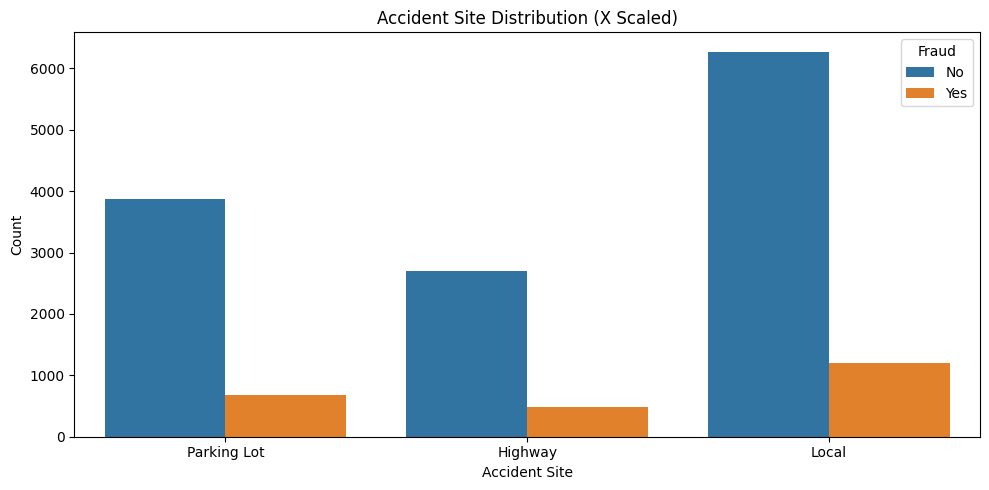

In [31]:
data_scaled = pd.concat([X_train_scaled, y_train.reset_index(drop=True)], axis=1)
# Create the 'accident_site' column based on Scaled column
data_scaled['accident_site'] = data_scaled.apply(
    lambda row: 'Parking Lot' if row['cat__accident_site_Parking Lot'] == 1 else ('Local' if row['cat__accident_site_Local'] == 1 else 'Highway'), axis=1
)

# Create the plot
plt.figure(figsize=(10, 5))
plot = sns.countplot(x='accident_site', hue='fraud', data=data_scaled)
plt.title('Accident Site Distribution (X Scaled)')
plt.xlabel('Accident Site')
plt.ylabel('Count')

# Changing Legend Labels
handles, labels = plot.get_legend_handles_labels()
plot.legend(handles, ['No', 'Yes'], title='Fraud')

plt.tight_layout()  # Adjust layout to make room for the title
plt.show()

* There are more number of accidents and fraud in Local accident site.
* The frequency of accident cases is lowest on Highway, similarly the number of fraud cases are lowest at the Highway accident site.


## 4.2. Tables

### 4.2.1 Average Claim Estimate Payout and Liability Percentage by Fraud Status

In [32]:
avg_payout_liab_by_fraud = pd.concat([X_train_resampled, y_train_resampled], axis=1).groupby('fraud')[['num__claim_est_payout', 'num__liab_prct']].mean().reset_index()
print("Average Claim Estimate Payout and Liability Percentage by Fraud Status")
avg_payout_liab_by_fraud.head()

Average Claim Estimate Payout and Liability Percentage by Fraud Status


,fraud,num__claim_est_payout,num__liab_prct
0,0,0.010302,0.000268
1,1,-0.083008,0.011030


### 4.2.2 Fraud Counts by Accident Site

In [33]:
data_resampled = pd.concat([X_train_resampled, y_train_resampled.reset_index(drop=True)], axis=1)
data_resampled['accident_site'] = data_resampled.apply(
    lambda row: 'Parking Lot' if row['cat__accident_site_Parking Lot'] == 1 else ('Local' if row['cat__accident_site_Local'] == 1 else 'Highway'), axis=1
)

fraud_counts_by_accident_site = pd.concat([data_resampled['accident_site'], y_train.reset_index(drop=True)], axis=1)
fraud_counts_by_accident_site = fraud_counts_by_accident_site.groupby([data_resampled['accident_site'], 'fraud']).size().unstack(fill_value=0)
print("Fraud Counts by Accident Site")
fraud_counts_by_accident_site.head()

Fraud Counts by Accident Site


fraud,0.0,1.0
accident_site,,
Highway,2703,476
Local,6272,1193
Parking Lot,3878,678


### 4.2.3 Average number of past claims by marital status and fraud status

In [34]:
avg_past_claims_by_marital_status_fraud = pd.concat([X_train_resampled, y_train_resampled], axis=1).groupby(['num__marital_status', 'fraud'])['num__past_num_of_claims'].mean().unstack().fillna(0)
avg_past_claims_by_marital_status_fraud.columns = ['Non-Fraudulent', 'Fraudulent']
avg_past_claims_by_marital_status_fraud.reset_index(inplace=True)
print("Average Number of Past Claims by Marital Status and Fraud Status")
avg_past_claims_by_marital_status_fraud.head()

Average Number of Past Claims by Marital Status and Fraud Status


,num__marital_status,Non-Fraudulent,Fraudulent
0,-2.704093,0.0,-0.526345
1,-2.698796,0.0,4.743348
2,-2.689675,0.0,4.743348
3,-2.678151,0.0,-0.526345
4,-2.677358,0.0,-0.526345


### 4.2.4 Average Vehicle Age by Claim Status

In [35]:
data_combined = pd.concat([X_train_resampled, y_train_resampled.reset_index(drop=True)], axis=1)

avg_vehicle_age_by_claim_status = pd.DataFrame(data_combined.groupby('fraud')['num__age_of_vehicle'].mean())
print("Average Vehicle Age by Claim Status")
avg_vehicle_age_by_claim_status.head()

Average Vehicle Age by Claim Status


,num__age_of_vehicle
fraud,
0,-0.016759
1,0.128491


### 4.2.5 Average Claim Payout by Accident Site

In [36]:
avg_claim_payout_by_accident_site = pd.DataFrame(data_combined.groupby(data_resampled['accident_site'])['num__claim_est_payout'].mean())
print("Average Claim Payout by Accident Site")
avg_claim_payout_by_accident_site.head()

Average Claim Payout by Accident Site


,num__claim_est_payout
accident_site,
Highway,-0.070512
Local,-0.004863
Parking Lot,-0.046932


# #5. Best Model

## 5.1 Verifying shape of the test partition

In [37]:
X_test_scaled.shape, y_test.shape

((3800, 36), (3800,))

## 5.2. Gradient Boosting Classifier

In [79]:
# Define the parameter grid for GradientBoostingClassifier
param_grid_rgb = {
    'n_estimators': [20],
    'learning_rate': [1],
    'max_depth': [2]
}

# Create a pipeline that includes an imputer and the GradientBoostingClassifier
pipeline_rgb = Pipeline([

    ('imputer', SimpleImputer(strategy='mean')),  # Using mean to impute missing values
    ('classifier', GradientBoostingClassifier(random_state=42))
])

# Initialize Grid Search
grid_search_rgb = GridSearchCV(estimator=pipeline_rgb, param_grid={'classifier__' + k: v for k, v in param_grid_rgb.items()}, cv=5, scoring='f1')
grid_search_rgb.fit(X_train_resampled, y_train_resampled)

# Identifying best hyperparameters and best score
best_params_rgb = grid_search_rgb.best_params_
best_score_rgb = grid_search_rgb.best_score_
print(f'Resampled Gradient Boosting Best Parameters: {best_params_rgb}')
print(f'Resampled Gradient Boosting Best Score: {best_score_rgb}')

# Get the best estimator from grid search
best_rgb = grid_search_rgb.best_estimator_

# Make predictions
y_train_pred_rgb = best_rgb.predict(X_train_resampled)
y_test_pred_rgb = best_rgb.predict(X_test_scaled)

Resampled Gradient Boosting Best Parameters: {'classifier__learning_rate': 1, 'classifier__max_depth': 2, 'classifier__n_estimators': 20}
Resampled Gradient Boosting Best Score: 0.7871462925506967


## 5.3. Model Results

In [80]:
# F1 Score
train_f1_rgb = f1_score(y_train_resampled, y_train_pred_rgb, average='weighted')
test_f1_rgb = f1_score(y_test, y_test_pred_rgb, average='weighted')
print(f'Resampled Gradient Boosting Training F1 Score: {train_f1_rgb}')
print(f'Resampled Gradient Boosting Test F1 Score: {test_f1_rgb}')

# Classification Report
print("Resampled Gradient Boosting Classification Report on Test Data:")
print(classification_report(y_test, y_test_pred_rgb))

# Confusion Matrix
print('Resampled Gradient Boosting Confusion Matrix:')
print(confusion_matrix(y_test, y_test_pred_rgb))

Resampled Gradient Boosting Training F1 Score: 0.8776380363771752
Resampled Gradient Boosting Test F1 Score: 0.7943117575337968
Resampled Gradient Boosting Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.86      0.93      0.90      3209
           1       0.34      0.19      0.25       591

    accuracy                           0.82      3800
   macro avg       0.60      0.56      0.57      3800
weighted avg       0.78      0.82      0.79      3800

Resampled Gradient Boosting Confusion Matrix:
[[2985  224]
 [ 476  115]]


* Out of all models from appendix, **Gradient Boosting Classifier** model was giving the best F1 score.
* Just to make the whole notebook faster, we did hyper-parameter tuning and just **kept the best parameters in each Parameter Grid**, resulting faster run-time.
* While rest of the models were giving us the F1 score of 0.75+ The best model gave the **F1 score of 0.7943.**
* **Training F1 Score of 0.8776** suggests, there is **no overfitting** on training dataset.

# #6. Interpretability

## 6.1. Permutation Importance

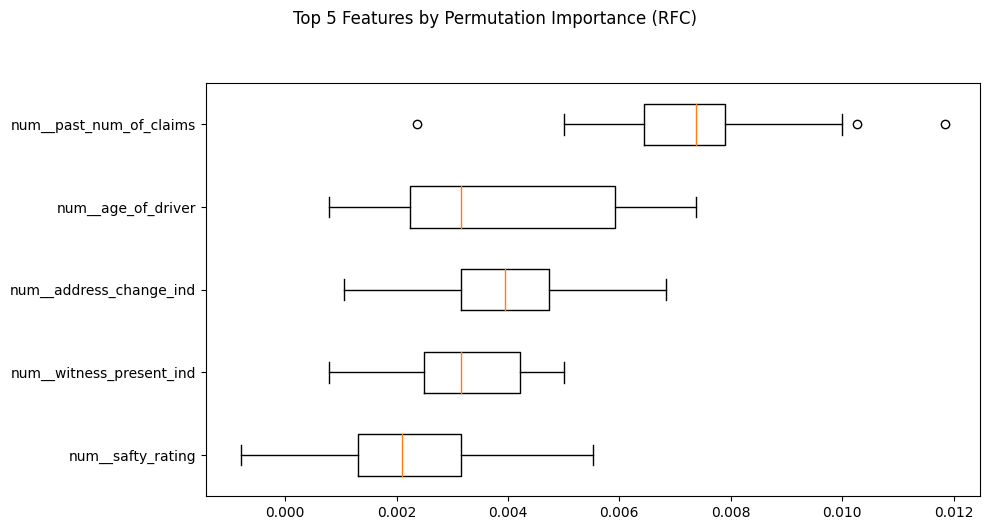

In [40]:
# Compute permutation importance with 15 repeats
result = permutation_importance(best_rgb, X_test_scaled, y_test, n_repeats=15, random_state=42)

# Get top 5 and top 10 features
perm_sorted_idx = result.importances_mean.argsort()[-5:]
perm_sorted_idx_t10 = result.importances_mean.argsort()[-10:]
feature_names = preprocessor.get_feature_names_out()

# Fetching top 5 features in a list to build an efficient model
top_5_features = [feature_names[i] for i in perm_sorted_idx]
top_10_features = [feature_names[i] for i in perm_sorted_idx_t10]

# Plot the top 5 features as a boxplot
fig, ax1 = plt.subplots(1, 1, figsize=(10, 5))
ax1.boxplot(result.importances[perm_sorted_idx].T, vert=False,
            labels=[feature_names[i] for i in perm_sorted_idx])
fig.suptitle('Top 5 Features by Permutation Importance (RFC)', y=1.05)

fig.tight_layout()
plt.show()

## 6.2. Partial Dependence

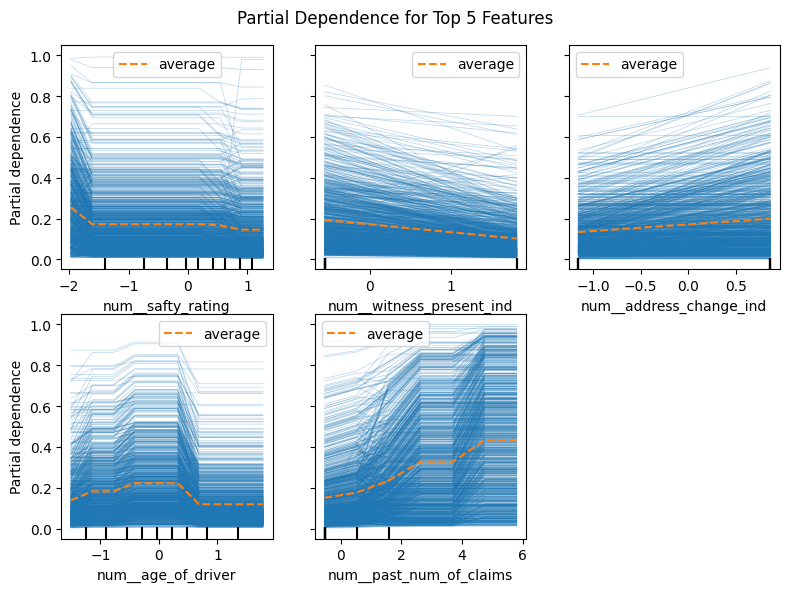

In [41]:
# Suppress specific warnings
warnings.filterwarnings("ignore", category=UserWarning)

# Plotting the Partial Dependence Display
fig, ax = plt.subplots(figsize=(8, 6))
display = PartialDependenceDisplay.from_estimator(best_rgb.named_steps['classifier'], X_train_scaled, top_5_features,
                                                  kind="both", ax=ax, grid_resolution=10)

fig.suptitle('Partial Dependence for Top 5 Features')
plt.tight_layout()
plt.show()

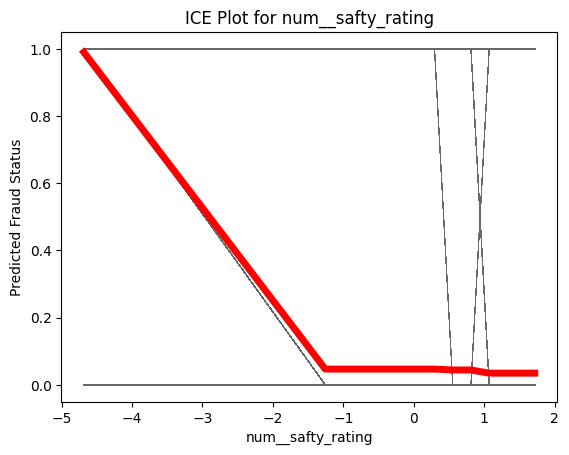

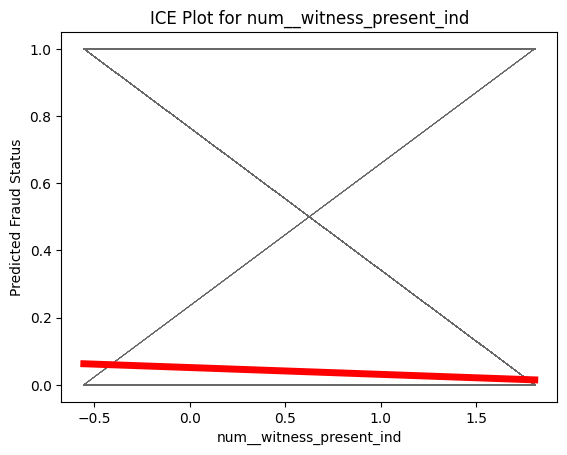

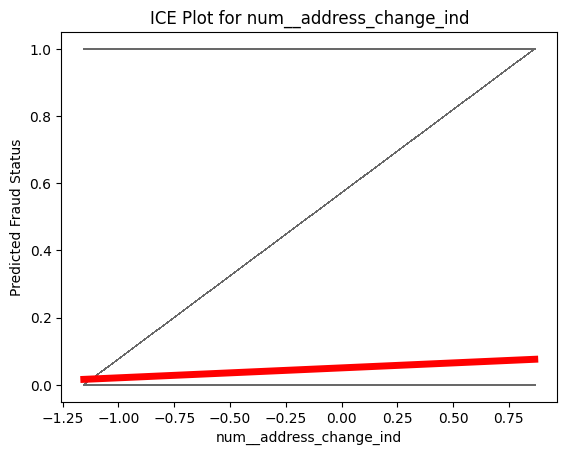

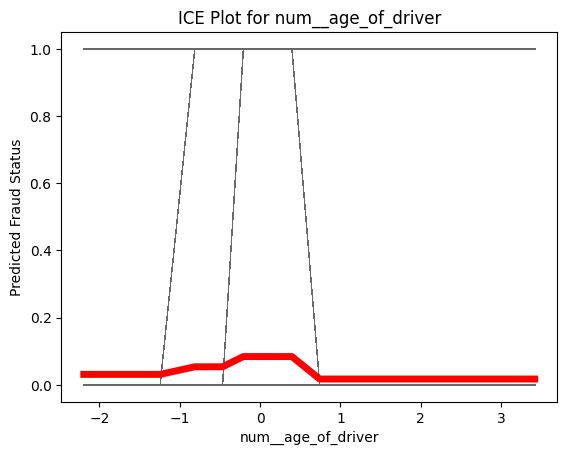

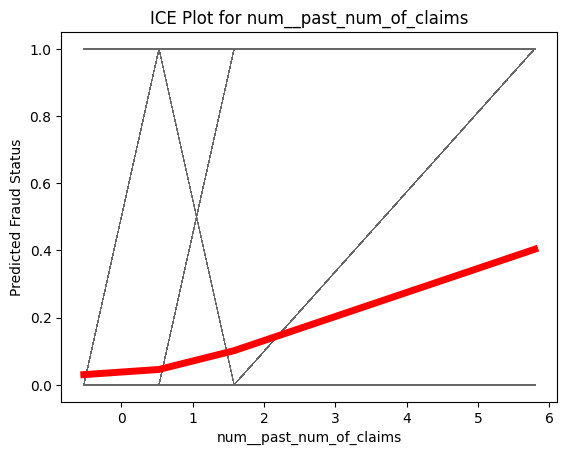

In [42]:
# Plot ICE for the top 5 features
for feature in top_5_features:
  # Suppress specific warnings
  warnings.filterwarnings("ignore", category=UserWarning)

  # Compute ICE
  tmpdf = ice(data=X_train_scaled, column=feature, predict=best_rgb.predict, num_grid_points=10)

  # Plot ICE
  ice_plot(tmpdf, c='dimgray', linewidth=0.3, plot_pdp=True, pdp_kwargs={'linewidth': 5, 'color':'red'})
  plt.title(f'ICE Plot for {feature}')
  plt.xlabel(feature)
  plt.ylabel('Predicted Fraud Status')
  plt.show()
  print('\n')

# #7. Model with top 5 Features

## 7.1. Create Top 5 Features DataFrame

In [43]:
# Select the top 5 features from the training and test datasets
X_train_top_5 = pd.DataFrame(X_train_scaled, columns=feature_names)[top_5_features]
X_test_top_5 = pd.DataFrame(X_test_scaled, columns=feature_names)[top_5_features]

# Ensure that the resampled data has the same columns
X_train_resampled_top_5 = pd.DataFrame(X_train_resampled, columns=feature_names)[top_5_features]

X_train_top_5.shape, X_test_top_5.shape, X_train_resampled_top_5.shape, y_test.shape

((15200, 5), (3800, 5), (25706, 5), (3800,))

## 7.2. Gradient Boosting Classifier for top 5 features

In [44]:
# Define the parameter grid for GradientBoostingClassifier
param_grid_rgb5 = {
    'n_estimators': [10, 20, 25],
    'learning_rate': [0.1, 1],
    'max_depth': [2, 3, 4, 5]
}

# Create a pipeline that includes an imputer and the GradientBoostingClassifier
pipeline_rgb5 = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Using mean to impute missing values
    ('classifier', GradientBoostingClassifier(random_state=42))
])

# Initialize Grid Search
grid_search_rgb5 = GridSearchCV(estimator=pipeline_rgb5, param_grid={'classifier__' + k: v for k, v in param_grid_rgb5.items()}, cv=5, scoring='f1')
grid_search_rgb5.fit(X_train_resampled_top_5, y_train_resampled)

# Identifying best hyperparameters and best score
best_params_rgb5 = grid_search_rgb5.best_params_
best_score_rgb5 = grid_search_rgb5.best_score_
print(f'Resampled Gradient Boosting Best Parameters: {best_params_rgb5}')
print(f'Resampled Gradient Boosting Best Score: {best_score_rgb5}')

# Get the best estimator from grid search
best_rgb5 = grid_search_rgb5.best_estimator_

# Make predictions
y_train_pred_rgb5 = best_rgb5.predict(X_train_resampled_top_5)
y_test_pred_rgb5 = best_rgb5.predict(X_test_top_5)

Resampled Gradient Boosting Best Parameters: {'classifier__learning_rate': 1, 'classifier__max_depth': 5, 'classifier__n_estimators': 25}
Resampled Gradient Boosting Best Score: 0.8065822752544447


## 7.3 Results for Top 5 Feature Model

In [45]:
# F1 Score
train_f1_rgb5 = f1_score(y_train_resampled, y_train_pred_rgb5, average='weighted')
test_f1_rgb5 = f1_score(y_test, y_test_pred_rgb5, average='weighted')
print(f'Resampled Gradient Boosting Training F1 Score: {train_f1_rgb5}')
print(f'Resampled Gradient Boosting Test F1 Score: {test_f1_rgb5}')

# Classification Report
print("Resampled Gradient Boosting Classification Report on Test Data:")
print(classification_report(y_test, y_test_pred_rgb5))

# Confusion Matrix
print('Resampled Gradient Boosting Confusion Matrix:')
print(confusion_matrix(y_test, y_test_pred_rgb5))

Resampled Gradient Boosting Training F1 Score: 0.9032942813656197
Resampled Gradient Boosting Test F1 Score: 0.7888080971659918
Resampled Gradient Boosting Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.85      0.96      0.90      3209
           1       0.34      0.10      0.16       591

    accuracy                           0.83      3800
   macro avg       0.60      0.53      0.53      3800
weighted avg       0.77      0.83      0.79      3800

Resampled Gradient Boosting Confusion Matrix:
[[3087  122]
 [ 529   62]]


* We build models based on the permutation importance top 5 and top 10 features (In Appendix).
* Based on the top 5 features, the F1 score was 0.7888. Also, it didn't suggest any signs of overfitting on training dataframe.

# #8. Policy Cancellation Analysis and Business Recommendation

## 8.1 Key Factors Influencing Cancellations

* **Past Claims (num__past_num_of_claims):** More past claims correlate with higher cancellation rates due to perceived higher risk and premiums.

* **Age of Driver (num__age_of_driver):** Younger drivers may be considered higher risk due to inexperience, while older drivers might be perceived differently based on age-related factors.

* **Frequency of Address Change (num__address_change_ind):** Frequent address changes might indicate instability or other risk factors that insurers consider when deciding on policy cancellations.

* **Witness Presence (num__witness_present_ind):** The presence of a witness during claims affects the legitimacy and processing, impacting satisfaction and cancellations.

* **Safety Rating (num__safty_rating):** Lower safety ratings suggest higher risk, which can lead to more policy cancellations.

**OTHER FACTORS**

* **Education Level (num__high_education_ind):** Households with more educated individuals tend to cancel less, likely due to better understanding of policies.

* **Vehicle Age (num__age_of_vehicle):** Older vehicles see more cancellations, possibly due to higher maintenance costs.

* **Estimated Claim Payout (num__claim_est_payout):** Higher estimated payouts can lead to higher premiums and more cancellations.

## 8.2 Recommendations Based on Model Results

* **Implement Risk Management Programs:** Customers with a higher number of past claims are more likely to cancel. Develop risk management programs to help these customers reduce future claims, such as offering safety courses or discounts for installing safety features.

* **Tailor Policies for Different Age Groups:** Offer age-specific insurance products that cater to the unique needs and risk profiles of different age groups. For example, create packages that offer additional support for younger drivers, such as educational resources and telematics-based monitoring.

* **Monitor Policyholders with Frequent Address Changes:** Implement a system to track address changes and assess the reasons behind frequent relocations. Consider offering additional support or advice to customers who move frequently. Also, use data analytics to identify patterns and potential risks associated with frequent address changes and tailor your policies accordingly.

* **Streamline the Claims Process:** Since the presence of a witness during claims affects cancellations, ensure a transparent and efficient claims process. Enhance customer service and use technology to verify claims quickly and accurately, improving customer satisfaction and retention.

* **Promote Safety Ratings:** Offer discounts or rewards for policyholders who drive safer vehicles or who achieve high safety ratings through defensive driving programs.

* **Educate Policyholders:** Since higher education levels correlate with lower cancellation rates, provide more educational resources and clear policy explanations to all customers to improve their understanding and satisfaction.

* **Offer Specialized Coverage for Older Vehicles:** Given that older vehicles are more likely to result in policy cancellations, create insurance packages tailored to the needs of older vehicle owners, possibly with lower premiums and additional benefits.

* **Flexible Premium Plans:** Higher estimated claim payouts can increase premiums and lead to cancellations. Introduce flexible premium payment plans or loyalty discounts to make insurance more affordable for customers with higher payout estimates.



# #9. Conclusion

* Working with a real-world dataset provided valuable experience in addressing practical challenges and problems. We learned how crucial it is to clean and preprocess data correctly to make accurate predictions that can provide meaningful business insights.

* We discovered that tuning hyperparameters can make a significant difference in model performance. By using GridSearchCV to explore different parameter combinations, we were able to optimize our models, leading to better accuracy and more reliable predictions.

* This project emphasized the importance of preprocessing techniques like handling missing values and scaling features. These steps are vital to ensure that our models work well and are not biased by data inconsistencies or scale differences.

* Comparing different models, such as Random Forest, Gradient Boosting, and SVM, gave us a deeper understanding of their strengths and weaknesses. This knowledge helps us choose the right model based on the specific needs and characteristics of the dataset we are working with.

* We learned that data science is an iterative process, involving continuous refinement of preprocessing steps, feature engineering, and model selection. This iterative approach is key to improving model performance and ensuring that the final solution is both accurate and dependable.

# #10. Appendix

## 10.1. Scaled Models

### 10.1.1. Logistic Regression

In [46]:
# Define the parameter grid for Logistic Regression
param_grid_slr = {
    'C': [1],
    'penalty': ['l2'],
    'solver': ['liblinear'],
    'max_iter': [100]
}

# Create a pipeline that includes an imputer and the LogisticRegression classifier
pipeline_slr = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Using mean to impute missing values
    ('classifier', LogisticRegression(random_state=42))
])

# Initialize Grid Search
grid_search_slr = GridSearchCV(estimator=pipeline_slr, param_grid={'classifier__' + k: v for k, v in param_grid_slr.items()}, cv=5, scoring='f1')
grid_search_slr.fit(X_train_scaled, y_train)

# Identifying best hyperparameters and best score
best_params_slr = grid_search_slr.best_params_
best_score_slr = grid_search_slr.best_score_
print(f'Scaled Logistic Regression Best Parameters: {best_params_slr}')
print(f'Scaled Logistic Regression Best Score: {best_score_slr}')

# Get the best estimator from grid search
best_s_log_reg = grid_search_slr.best_estimator_

# Make predictions
y_train_pred_slr = best_s_log_reg.predict(X_train_scaled)
y_test_pred_slr = best_s_log_reg.predict(X_test_scaled)

# Evaluate the model
train_f1_slr = f1_score(y_train, y_train_pred_slr, average='weighted')
test_f1_slr = f1_score(y_test, y_test_pred_slr, average='weighted')

# Printing the Results
print(f'Scaled Logistic Regression Training F1 Score: {train_f1_slr}')
print(f'Scaled Logistic Regression Test F1 Score: {test_f1_slr}')
print("\nScaled Logistic Regression Classification Report on Test Data:")
print(classification_report(y_test, y_test_pred_slr))
print('Scaled Logistic Regression Confusion Matrix:')
print(confusion_matrix(y_test, y_test_pred_slr))

Scaled Logistic Regression Best Parameters: {'classifier__C': 1, 'classifier__max_iter': 100, 'classifier__penalty': 'l2', 'classifier__solver': 'liblinear'}
Scaled Logistic Regression Best Score: 0.029700600061350425
Scaled Logistic Regression Training F1 Score: 0.7787153769042405
Scaled Logistic Regression Test F1 Score: 0.7775424672989023

Scaled Logistic Regression Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      3209
           1       0.47      0.02      0.03       591

    accuracy                           0.84      3800
   macro avg       0.66      0.51      0.47      3800
weighted avg       0.79      0.84      0.78      3800

Scaled Logistic Regression Confusion Matrix:
[[3199   10]
 [ 582    9]]


### 10.1.2. k-Nearest Neighbors (KNN)

In [47]:
# Define the parameter grid for KNeighborsClassifier
param_grid_sknn = {
    'n_neighbors': [1],
    'weights': ['uniform'],
    'metric': ['chebyshev']
}

# Create a pipeline that includes an imputer and the KNeighborsClassifier
pipeline_sknn = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Using mean to impute missing values
    ('classifier', KNeighborsClassifier())
])

# Initialize Grid Search
grid_search_sknn = GridSearchCV(estimator=pipeline_sknn, param_grid={'classifier__' + k: v for k, v in param_grid_sknn.items()}, cv=5, scoring='f1')
grid_search_sknn.fit(X_train_scaled, y_train)

# Identifying best hyperparameters and best score
best_params_sknn = grid_search_sknn.best_params_
best_score_sknn = grid_search_sknn.best_score_
print(f'Scaled KNN Best Parameters: {best_params_sknn}')
print(f'Scaled KNN Best Score: {best_score_sknn}')

# Get the best estimator from grid search
best_sknn = grid_search_sknn.best_estimator_

# Make predictions
y_train_pred_sknn = best_sknn.predict(X_train_scaled)
y_test_pred_sknn = best_sknn.predict(X_test_scaled)

# Evaluate the model
train_f1_sknn = f1_score(y_train, y_train_pred_sknn, average='weighted')
test_f1_sknn = f1_score(y_test, y_test_pred_sknn, average='weighted')
print(f'Scaled KNN Training F1 Score: {train_f1_sknn}')
print(f'Scaled KNN Test F1 Score: {test_f1_sknn}')
print("\nScaled KNN Classification Report on Test Data:")
print(classification_report(y_test, y_test_pred_sknn))
print('Scaled KNN Confusion Matrix:')
print(confusion_matrix(y_test, y_test_pred_sknn))

Scaled KNN Best Parameters: {'classifier__metric': 'chebyshev', 'classifier__n_neighbors': 1, 'classifier__weights': 'uniform'}
Scaled KNN Best Score: 0.19696281887612843
Scaled KNN Training F1 Score: 1.0
Scaled KNN Test F1 Score: 0.7524460001114208

Scaled KNN Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.85      0.85      0.85      3209
           1       0.21      0.21      0.21       591

    accuracy                           0.75      3800
   macro avg       0.53      0.53      0.53      3800
weighted avg       0.75      0.75      0.75      3800

Scaled KNN Confusion Matrix:
[[2736  473]
 [ 469  122]]


### 10.1.3. Support Vector Machine (SVM)

In [48]:
# Define the parameter grid for SVC
param_grid_ssvc = {
    'C': [1],
    'kernel': ['sigmoid'],
    'gamma': ['scale']
}

# Create a pipeline that includes an imputer and the SVC
pipeline_ssvc = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Using mean to impute missing values
    ('classifier', SVC())
])

# Initialize Grid Search
grid_search_ssvc = GridSearchCV(estimator=pipeline_ssvc, param_grid={'classifier__' + k: v for k, v in param_grid_ssvc.items()}, cv=5, scoring='f1')
grid_search_ssvc.fit(X_train_scaled, y_train)

# Identifying best hyperparameters and best score
best_params_ssvc = grid_search_ssvc.best_params_
best_score_ssvc = grid_search_ssvc.best_score_
print(f'Scaled SVM Best Parameters: {best_params_ssvc}')
print(f'Scaled SVM Best Score: {best_score_ssvc}')

# Get the best estimator from grid search
best_ssvc = grid_search_ssvc.best_estimator_

# Make predictions
y_train_pred_ssvc = best_ssvc.predict(X_train_scaled)
y_test_pred_ssvc = best_ssvc.predict(X_test_scaled)

# Evaluate the model
train_f1_ssvc = f1_score(y_train, y_train_pred_ssvc, average='weighted')
test_f1_ssvc = f1_score(y_test, y_test_pred_ssvc, average='weighted')
print(f'Scaled SVM Training F1 Score: {train_f1_ssvc}')
print(f'Scaled SVM Test F1 Score: {test_f1_ssvc}')
print("\nScaled SVM Classification Report on Test Data:")
print(classification_report(y_test, y_test_pred_ssvc))
print('Scaled SVM Confusion Matrix:')
print(confusion_matrix(y_test, y_test_pred_ssvc))

Scaled SVM Best Parameters: {'classifier__C': 1, 'classifier__gamma': 'scale', 'classifier__kernel': 'sigmoid'}
Scaled SVM Best Score: 0.13410049260276005
Scaled SVM Training F1 Score: 0.7464614300502793
Scaled SVM Test F1 Score: 0.7552138475446888

Scaled SVM Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.85      0.88      0.87      3209
           1       0.18      0.14      0.16       591

    accuracy                           0.77      3800
   macro avg       0.51      0.51      0.51      3800
weighted avg       0.74      0.77      0.76      3800

Scaled SVM Confusion Matrix:
[[2836  373]
 [ 509   82]]


### 10.1.4. Decision Tree

In [49]:
# Define the parameter grid for Decision Tree
param_grid_sdt = {
    'criterion': ['gini'],
    'splitter': ['random'],
    'max_depth': [20],
    'min_samples_split': [5],
    'min_samples_leaf': [1],
}

# Create a pipeline that includes an imputer and the DecisionTreeClassifier
pipeline_sdt = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Using mean to impute missing values
    ('classifier', DecisionTreeClassifier(random_state=42))
])

# Initialize Grid Search
grid_search_sdt = GridSearchCV(estimator=pipeline_sdt, param_grid={'classifier__' + k: v for k, v in param_grid_sdt.items()}, cv=5, scoring='f1')
grid_search_sdt.fit(X_train_scaled, y_train)

# Identifying best hyperparameters and best score
best_params_sdt = grid_search_sdt.best_params_
best_score_sdt = grid_search_sdt.best_score_
print(f'Scaled Decision Tree Classifier Best Parameters: {best_params_sdt}')
print(f'Scaled Decision Tree Classifier Best Score: {best_score_sdt}')

# Get the best estimator from grid search
best_sdt = grid_search_sdt.best_estimator_

# Make predictions
y_train_pred_sdt = best_sdt.predict(X_train_scaled)
y_test_pred_sdt = best_sdt.predict(X_test_scaled)

# Evaluate the model
train_f1_sdt = f1_score(y_train, y_train_pred_sdt, average='weighted')
test_f1_sdt = f1_score(y_test, y_test_pred_sdt, average='weighted')
print(f'Scaled Decision Tree Classifier Training F1 Score: {train_f1_sdt}')
print(f'Scaled Decision Tree Classifier Test F1 Score: {test_f1_sdt}')
print("\nScaled Decision Tree Classification Report on Test Data:")
print(classification_report(y_test, y_test_pred_sdt))
print('Scaled Decision Tree Classifier Confusion Matrix:')
print(confusion_matrix(y_test, y_test_pred_sdt))

Scaled Decision Tree Classifier Best Parameters: {'classifier__criterion': 'gini', 'classifier__max_depth': 20, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 5, 'classifier__splitter': 'random'}
Scaled Decision Tree Classifier Best Score: 0.21332488912853265
Scaled Decision Tree Classifier Training F1 Score: 0.9548411042952031
Scaled Decision Tree Classifier Test F1 Score: 0.746658200301664

Scaled Decision Tree Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.85      0.85      0.85      3209
           1       0.18      0.18      0.18       591

    accuracy                           0.75      3800
   macro avg       0.52      0.52      0.52      3800
weighted avg       0.75      0.75      0.75      3800

Scaled Decision Tree Classifier Confusion Matrix:
[[2737  472]
 [ 486  105]]


### 10.1.5. Random Forest

In [50]:
# Define the parameter grid for RandomForestClassifier
param_grid_srf = {
    'n_estimators': [25],
    'criterion': ['gini'],
    'max_depth': [20]
}

# Create a pipeline that includes an imputer and the RandomForestClassifier
pipeline_srf = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Using mean to impute missing values
    ('classifier', RandomForestClassifier(random_state=42))
])

# Initialize Grid Search
grid_search_srf = GridSearchCV(estimator=pipeline_srf, param_grid={'classifier__' + k: v for k, v in param_grid_srf.items()}, cv=5, scoring='f1')
grid_search_srf.fit(X_train_scaled, y_train)

# Identifying best hyperparameters and best score
best_params_srf = grid_search_srf.best_params_
best_score_srf = grid_search_srf.best_score_
print(f'Scaled Random Forest Best Parameters: {best_params_srf}')
print(f'Scaled Random Forest Best Score: {best_score_srf}')

# Get the best estimator from grid search
best_srf = grid_search_srf.best_estimator_

# Make predictions
y_train_pred_srf = best_srf.predict(X_train_scaled)
y_test_pred_srf = best_srf.predict(X_test_scaled)

# Evaluate the model
train_f1_srf = f1_score(y_train, y_train_pred_srf, average='weighted')
test_f1_srf = f1_score(y_test, y_test_pred_srf, average='weighted')
print(f'Scaled Random Forest Training F1 Score: {train_f1_srf}')
print(f'Scaled Random Forest Test F1 Score: {test_f1_srf}')
print("\nScaled Random Forest Classification Report on Test Data:")
print(classification_report(y_test, y_test_pred_srf))
print('Scaled Random Forest Confusion Matrix:')
print(confusion_matrix(y_test, y_test_pred_srf))

Scaled Random Forest Best Parameters: {'classifier__criterion': 'gini', 'classifier__max_depth': 20, 'classifier__n_estimators': 25}
Scaled Random Forest Best Score: 0.030969661274620097
Scaled Random Forest Training F1 Score: 0.9858482485872871
Scaled Random Forest Test F1 Score: 0.7778229812799463

Scaled Random Forest Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.85      0.99      0.91      3209
           1       0.36      0.02      0.04       591

    accuracy                           0.84      3800
   macro avg       0.60      0.51      0.48      3800
weighted avg       0.77      0.84      0.78      3800

Scaled Random Forest Confusion Matrix:
[[3188   21]
 [ 579   12]]


### 10.1.6. Gradient Boosting Classifier (GBC)

In [51]:
# Define the parameter grid for GradientBoostingClassifier
param_grid_sgb = {
    'n_estimators': [75],
    'learning_rate': [0.1],
    'max_depth': [5]
}

# Create a pipeline that includes an imputer and the GradientBoostingClassifier
pipeline_sgb = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Using mean to impute missing values
    ('classifier', GradientBoostingClassifier(random_state=42))
])

# Initialize Grid Search
grid_search_sgb = GridSearchCV(estimator=pipeline_sgb, param_grid={'classifier__' + k: v for k, v in param_grid_sgb.items()}, cv=5, scoring='f1')
grid_search_sgb.fit(X_train_scaled, y_train)

# Identifying best hyperparameters and best score
best_params_sgb = grid_search_sgb.best_params_
best_score_sgb = grid_search_sgb.best_score_
print(f'Scaled Gradient Boosting Best Parameters: {best_params_sgb}')
print(f'Scaled Gradient Boosting Best Score: {best_score_sgb}')

# Get the best estimator from grid search
best_sgb = grid_search_sgb.best_estimator_

# Make predictions
y_train_pred_sgb = best_sgb.predict(X_train_scaled)
y_test_pred_sgb = best_sgb.predict(X_test_scaled)

# Evaluate the model
train_f1_sgb = f1_score(y_train, y_train_pred_sgb, average='weighted')
test_f1_sgb = f1_score(y_test, y_test_pred_sgb, average='weighted')
print(f'Scaled Gradient Boosting Training F1 Score: {train_f1_sgb}')
print(f'Scaled Gradient Boosting Test F1 Score: {test_f1_sgb}')
print("Scaled Gradient Boosting Classification Report on Test Data:")
print(classification_report(y_test, y_test_pred_sgb))
print('Scaled Gradient Boosting Confusion Matrix:')
print(confusion_matrix(y_test, y_test_pred_sgb))

Scaled Gradient Boosting Best Parameters: {'classifier__learning_rate': 0.1, 'classifier__max_depth': 5, 'classifier__n_estimators': 75}
Scaled Gradient Boosting Best Score: 0.06987484527755658
Scaled Gradient Boosting Training F1 Score: 0.816558661467245
Scaled Gradient Boosting Test F1 Score: 0.7862179038765286
Scaled Gradient Boosting Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.85      0.99      0.91      3209
           1       0.46      0.05      0.09       591

    accuracy                           0.84      3800
   macro avg       0.66      0.52      0.50      3800
weighted avg       0.79      0.84      0.79      3800

Scaled Gradient Boosting Confusion Matrix:
[[3174   35]
 [ 561   30]]


## 10.2. Resampled Models

### 10.2.1. Logistic Regression

In [52]:
# Define the parameter grid for Logistic Regression
param_grid_rlr = {
    'C': [0.01],
    'penalty': ['l1'],
    'solver': ['liblinear'],
    'max_iter': [100]
}

# Create a pipeline that includes an imputer and the LogisticRegression classifier
pipeline_rlr = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Using mean to impute missing values
    ('classifier', LogisticRegression(random_state=42))
])

# Initialize Grid Search
grid_search_rlr = GridSearchCV(estimator=pipeline_rlr, param_grid={'classifier__' + k: v for k, v in param_grid_rlr.items()}, cv=5, scoring='f1')
grid_search_rlr.fit(X_train_resampled, y_train_resampled)

# Identifying best hyperparameters and best score
best_params_rlr = grid_search_rlr.best_params_
best_score_rlr = grid_search_rlr.best_score_
print(f'Resampled Logistic Regression Best Parameters: {best_params_rlr}')
print(f'Resampled Logistic Regression Best Score: {best_score_rlr}')

# Get the best estimator from grid search
best_rlog_reg = grid_search_rlr.best_estimator_

# Make predictions
y_train_pred_rlr = best_rlog_reg.predict(X_train_resampled)
y_test_pred_rlr = best_rlog_reg.predict(X_test_scaled)

# Evaluate the model
train_f1_rlr = f1_score(y_train_resampled, y_train_pred_rlr, average='weighted')
test_f1_rlr = f1_score(y_test, y_test_pred_rlr, average='weighted')
print(f'Resampled Logistic Regression Training F1 Score: {train_f1_rlr}')
print(f'Resampled Logistic Regression Test F1 Score: {test_f1_rlr}')
print("\nResampled Logistic Regression Classification Report on Test Data:")
print(classification_report(y_test, y_test_pred_rlr))
print('Resampled Logistic Regression Confusion Matrix:')
print(confusion_matrix(y_test, y_test_pred_rlr))

Resampled Logistic Regression Best Parameters: {'classifier__C': 0.01, 'classifier__max_iter': 100, 'classifier__penalty': 'l1', 'classifier__solver': 'liblinear'}
Resampled Logistic Regression Best Score: 0.6745943327393612
Resampled Logistic Regression Training F1 Score: 0.7191540427735121
Resampled Logistic Regression Test F1 Score: 0.7342435101373449

Resampled Logistic Regression Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.89      0.74      0.81      3209
           1       0.26      0.50      0.34       591

    accuracy                           0.70      3800
   macro avg       0.57      0.62      0.57      3800
weighted avg       0.79      0.70      0.73      3800

Resampled Logistic Regression Confusion Matrix:
[[2366  843]
 [ 294  297]]


### 10.2.2. k-Nearest Neighbors (KNN)

In [53]:
# Define the parameter grid for KNeighborsClassifier
param_grid_rknn = {
    'n_neighbors': [1],
    'weights': ['uniform'],
    'metric': ['cityblock']
}

# Create a pipeline that includes an imputer and the KNeighborsClassifier
pipeline_rknn = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Using mean to impute missing values
    ('classifier', KNeighborsClassifier())
])

# Initialize Grid Search
grid_search_rknn = GridSearchCV(estimator=pipeline_rknn, param_grid={'classifier__' + k: v for k, v in param_grid_rknn.items()}, cv=5, scoring='f1')
grid_search_rknn.fit(X_train_resampled, y_train_resampled)

# Identifying best hyperparameters and best score
best_params_rknn = grid_search_rknn.best_params_
best_score_rknn = grid_search_rknn.best_score_
print(f'Resampled KNN Best Parameters: {best_params_rknn}')
print(f'Resampled KNN Best Score: {best_score_rknn}')

# Get the best estimator from grid search
best_rknn = grid_search_rknn.best_estimator_

# Make predictions
y_train_pred_rknn = best_rknn.predict(X_train_resampled)
y_test_pred_rknn = best_rknn.predict(X_test_scaled)

# Evaluate the model
train_f1_rknn = f1_score(y_train_resampled, y_train_pred_rknn, average='weighted')
test_f1_rknn = f1_score(y_test, y_test_pred_rknn, average='weighted')
print(f'Resampled KNN Training F1 Score: {train_f1_rknn}')
print(f'Resampled KNN Test F1 Score: {test_f1_rknn}')
print("\nResampled KNN Classification Report on Test Data:")
print(classification_report(y_test, y_test_pred_rknn))
print('Resampled KNN Confusion Matrix:')
print(confusion_matrix(y_test, y_test_pred_rknn))

Resampled KNN Best Parameters: {'classifier__metric': 'cityblock', 'classifier__n_neighbors': 1, 'classifier__weights': 'uniform'}
Resampled KNN Best Score: 0.9130758283021814
Resampled KNN Training F1 Score: 1.0
Resampled KNN Test F1 Score: 0.7401373682348946

Resampled KNN Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.85      0.84      0.84      3209
           1       0.18      0.19      0.18       591

    accuracy                           0.74      3800
   macro avg       0.51      0.51      0.51      3800
weighted avg       0.74      0.74      0.74      3800

Resampled KNN Confusion Matrix:
[[2686  523]
 [ 479  112]]


### 10.2.3. Support Vector Machine (SVM)

In [54]:
# Define the parameter grid for SVC
param_grid_rsvc = {
    'C': [1],
    'kernel': ['linear'],
    'gamma': ['scale']
}

# Create a pipeline that includes an imputer and the SVC
pipeline_rsvc = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Using mean to impute missing values
    ('classifier', SVC())
])

# Initialize Grid Search
grid_search_rsvc = GridSearchCV(estimator=pipeline_rsvc, param_grid={'classifier__' + k: v for k, v in param_grid_rsvc.items()}, cv=5, scoring='f1')
grid_search_rsvc.fit(X_train_resampled, y_train_resampled)

# Identifying best hyperparameters and best score
best_params_rsvc = grid_search_rsvc.best_params_
best_score_rsvc = grid_search_rsvc.best_score_
print(f'Resampled SVM Best Parameters: {best_params_rsvc}')
print(f'Resampled SVM Best Score: {best_score_rsvc}')

# Get the best estimator from grid search
best_rsvc = grid_search_rsvc.best_estimator_

# Make predictions
y_train_pred_rsvc = best_rsvc.predict(X_train_resampled)
y_test_pred_rsvc = best_rsvc.predict(X_test_scaled)

# Evaluate the model
train_f1_rsvc = f1_score(y_train_resampled, y_train_pred_rsvc, average='weighted')
test_f1_rsvc = f1_score(y_test, y_test_pred_ssvc, average='weighted')
print(f'Resampled SVM Training F1 Score: {train_f1_rsvc}')
print(f'Resampled SVM Test F1 Score: {test_f1_rsvc}')
print("\nResampled SVM Classification Report on Test Data:")
print(classification_report(y_test, y_test_pred_rsvc))
print('Resampled SVM Confusion Matrix:')
print(confusion_matrix(y_test, y_test_pred_rsvc))

Resampled SVM Best Parameters: {'classifier__C': 1, 'classifier__gamma': 'scale', 'classifier__kernel': 'linear'}
Resampled SVM Best Score: 0.6606491201128946
Resampled SVM Training F1 Score: 0.7244962073900462
Resampled SVM Test F1 Score: 0.7552138475446888

Resampled SVM Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.89      0.78      0.83      3209
           1       0.27      0.45      0.34       591

    accuracy                           0.73      3800
   macro avg       0.58      0.62      0.59      3800
weighted avg       0.79      0.73      0.75      3800

Resampled SVM Confusion Matrix:
[[2505  704]
 [ 324  267]]


### 10.2.4. Decision Tree

In [55]:
# Define the parameter grid for Decision Tree
param_grid_rdt = {
    'criterion': ['entropy'],
    'splitter': ['random'],
    'max_depth': [20],
    'min_samples_split': [2],
    'min_samples_leaf': [1],
}

# Create a pipeline that includes an imputer and the DecisionTreeClassifier
pipeline_rdt = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Using mean to impute missing values
    ('classifier', DecisionTreeClassifier(random_state=42))
])

# Initialize Grid Search
grid_search_rdt = GridSearchCV(estimator=pipeline_rdt, param_grid={'classifier__' + k: v for k, v in param_grid_rdt.items()}, cv=5, scoring='f1')
grid_search_rdt.fit(X_train_resampled, y_train_resampled)

# Identifying best hyperparameters and best score
best_params_rdt = grid_search_rdt.best_params_
best_score_rdt = grid_search_rdt.best_score_
print(f'Resampled Decision Tree Classifier Best Parameters: {best_params_rdt}')
print(f'Resampled Decision Tree Classifier Best Score: {best_score_rdt}')

# Get the best estimator from grid search
best_rdt = grid_search_rdt.best_estimator_

# Make predictions
y_train_pred_rdt = best_rdt.predict(X_train_resampled)
y_test_pred_rdt = best_rdt.predict(X_test_scaled)

# Evaluate the model
train_f1_rdt = f1_score(y_train_resampled, y_train_pred_rdt, average='weighted')
test_f1_rdt = f1_score(y_test, y_test_pred_rdt, average='weighted')
print(f'Resampled Decision Tree Classifier Training F1 Score: {train_f1_rdt}')
print(f'Resampled Decision Tree Classifier Test F1 Score: {test_f1_rdt}')
print("\nResampled Decision Tree Classification Report on Test Data:")
print(classification_report(y_test, y_test_pred_rdt))
print('Resampled Decision Tree Classifier Confusion Matrix:')
print(confusion_matrix(y_test, y_test_pred_rdt))

Resampled Decision Tree Classifier Best Parameters: {'classifier__criterion': 'entropy', 'classifier__max_depth': 20, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'classifier__splitter': 'random'}
Resampled Decision Tree Classifier Best Score: 0.7864750981128044
Resampled Decision Tree Classifier Training F1 Score: 0.9342490758567252
Resampled Decision Tree Classifier Test F1 Score: 0.75755978933655

Resampled Decision Tree Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.85      0.87      0.86      3209
           1       0.21      0.19      0.20       591

    accuracy                           0.76      3800
   macro avg       0.53      0.53      0.53      3800
weighted avg       0.75      0.76      0.76      3800

Resampled Decision Tree Classifier Confusion Matrix:
[[2789  420]
 [ 481  110]]


### 10.2.5. Random Forest

In [56]:
# Define the parameter grid for RandomForestClassifier
param_grid_rrf = {
    'n_estimators': [75],
    'criterion': ['gini'],
    'max_depth': [20]
}

# Create a pipeline that includes an imputer and the RandomForestClassifier
pipeline_rrf = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Using mean to impute missing values
    ('classifier', RandomForestClassifier(random_state=42))
])

# Initialize Grid Search
grid_search_rrf = GridSearchCV(estimator=pipeline_rrf, param_grid={'classifier__' + k: v for k, v in param_grid_rrf.items()}, cv=5, scoring='f1')
grid_search_rrf.fit(X_train_resampled, y_train_resampled)

# Identifying best hyperparameters and best score
best_params_rrf = grid_search_rrf.best_params_
best_score_rrf = grid_search_rrf.best_score_
print(f'Resampled Random Forest Best Parameters: {best_params_rrf}')
print(f'Resampled Random Forest Best Score: {best_score_rrf}')

# Get the best estimator from grid search
best_rrf = grid_search_rrf.best_estimator_

# Make predictions
y_train_pred_rrf = best_rrf.predict(X_train_resampled)
y_test_pred_rrf = best_rrf.predict(X_test_scaled)

# Evaluate the model
train_f1_rrf = f1_score(y_train_resampled, y_train_pred_rrf, average='weighted')
test_f1_rrf = f1_score(y_test, y_test_pred_rrf, average='weighted')
print(f'Resampled Random Forest Training F1 Score: {train_f1_rrf}')
print(f'Resampled Random Forest Test F1 Score: {test_f1_rrf}')
print("\nResampled Random Forest Classification Report on Test Data:")
print(classification_report(y_test, y_test_pred_rrf))
print('Resampled Random Forest Confusion Matrix:')
print(confusion_matrix(y_test, y_test_pred_rrf))

Resampled Random Forest Best Parameters: {'classifier__criterion': 'gini', 'classifier__max_depth': 20, 'classifier__n_estimators': 75}
Resampled Random Forest Best Score: 0.8434512198809241
Resampled Random Forest Training F1 Score: 0.994203498301553
Resampled Random Forest Test F1 Score: 0.7919138148874877

Resampled Random Forest Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.85      0.98      0.91      3209
           1       0.43      0.08      0.14       591

    accuracy                           0.84      3800
   macro avg       0.64      0.53      0.53      3800
weighted avg       0.79      0.84      0.79      3800

Resampled Random Forest Confusion Matrix:
[[3145   64]
 [ 542   49]]


## 10.3 Top 10 Features Gradient Boosting Classifier Model

In [57]:
# Select the top 5 features from the training and test datasets
X_train_top_10 = pd.DataFrame(X_train_scaled, columns=feature_names)[top_10_features]
X_test_top_10 = pd.DataFrame(X_test_scaled, columns=feature_names)[top_10_features]

# Ensure that the resampled data has the same columns
X_train_resampled_top_10 = pd.DataFrame(X_train_resampled, columns=feature_names)[top_10_features]

X_train_top_10.shape, X_test_top_10.shape, X_train_resampled_top_10.shape, y_test.shape

# Define the parameter grid for GradientBoostingClassifier
param_grid_rgb10 = {
    'n_estimators': [10, 20, 25],
    'learning_rate': [0.1, 1],
    'max_depth': [2, 3, 4, 5]
}

# Create a pipeline that includes an imputer and the GradientBoostingClassifier
pipeline_rgb10 = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Using mean to impute missing values
    ('classifier', GradientBoostingClassifier(random_state=42))
])

# Initialize Grid Search
grid_search_rgb10 = GridSearchCV(estimator=pipeline_rgb10, param_grid={'classifier__' + k: v for k, v in param_grid_rgb10.items()}, cv=5, scoring='f1')
grid_search_rgb10.fit(X_train_resampled_top_10, y_train_resampled)

# Identifying best hyperparameters and best score
best_params_rgb10 = grid_search_rgb10.best_params_
best_score_rgb10 = grid_search_rgb10.best_score_
print(f'Resampled Gradient Boosting Best Parameters: {best_params_rgb10}')
print(f'Resampled Gradient Boosting Best Score: {best_score_rgb10}')

# Get the best estimator from grid search
best_rgb10 = grid_search_rgb10.best_estimator_

# Make predictions
y_train_pred_rgb10 = best_rgb10.predict(X_train_resampled_top_10)
y_test_pred_rgb10 = best_rgb10.predict(X_test_top_10)

# F1 Score
train_f1_rgb10 = f1_score(y_train_resampled, y_train_pred_rgb10, average='weighted')
test_f1_rgb10 = f1_score(y_test, y_test_pred_rgb10, average='weighted')
print(f'Resampled Gradient Boosting Training F1 Score: {train_f1_rgb10}')
print(f'Resampled Gradient Boosting Test F1 Score: {test_f1_rgb10}')

# Classification Report
print("Resampled Gradient Boosting Classification Report on Test Data:")
print(classification_report(y_test, y_test_pred_rgb10))

# Confusion Matrix
print('Resampled Gradient Boosting Confusion Matrix:')
print(confusion_matrix(y_test, y_test_pred_rgb10))

Resampled Gradient Boosting Best Parameters: {'classifier__learning_rate': 1, 'classifier__max_depth': 5, 'classifier__n_estimators': 20}
Resampled Gradient Boosting Best Score: 0.7948127552711824
Resampled Gradient Boosting Training F1 Score: 0.8988660236672573
Resampled Gradient Boosting Test F1 Score: 0.7905645629677865
Resampled Gradient Boosting Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.86      0.95      0.90      3209
           1       0.33      0.14      0.20       591

    accuracy                           0.82      3800
   macro avg       0.59      0.54      0.55      3800
weighted avg       0.77      0.82      0.79      3800

Resampled Gradient Boosting Confusion Matrix:
[[3043  166]
 [ 509   82]]
